<a href="https://colab.research.google.com/github/PorasS/AI/blob/master/RegularizationL1andL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to Regularization: Ridge and Lasso**

Regularization is a technique that reduces overfitting, which occurs when neural networks attempt to memorize training data, rather than learn from it. Humans are capable of overfitting as well. Before we examine the ways that a machine accidentally overfits, we will first explore how humans can suffer from it.

Human programmers often take certification exams to show their competence in a given programming language. To help prepare for these exams, the test makers often make practice exams available. Consider a programmer who enters a loop of taking the practice exam, studying more, and then taking the practice exam again. At some point, the programmer has memorized much of the practice exam, rather than learning the techniques necessary to figure out the individual questions. The programmer has now overfit to the practice exam. When this programmer takes the real exam, his actual score will likely be lower than what he earned on the practice exam.

A computer can overfit as well. Although a neural network received a high score on its training data, this result does not mean that the same neural network will score high on data that was not inside the training set. Regularization is one of the techniques that can prevent overfitting. A number of different regularization techniques exist. Most work by analyzing and potentially modifying the weights of a neural network as it trains.

**L1 and L2 Regularization**

L1 and L2 regularization are two common regularization techniques that can reduce the effects of overfitting (Ng, 2004). Both of these algorithms can either work with an objective function or as a part of the backpropagation algorithm. In both cases the regularization algorithm is attached to the training algorithm by adding an additional objective.

Both of these algorithms work by adding a weight penalty to the neural network training. This penalty encourages the neural network to keep the weights to small values. Both L1 and L2 calculate this penalty differently. For gradient-descent-based algorithms, such as backpropagation, you can add this penalty calculation to the calculated gradients. For objective-function-based training, such as simulated annealing, the penalty is negatively combined with the objective score.

We are going to look at linear regression to see how L1 and L2 regularization work. The following code sets up the auto-mpg data for this purpose.

In [ ]:
from sklearn.linear_model import LassoCV
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

display(df[0:5])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
# Handle missing values
med = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(med)

In [ ]:
# Pandas to numpy
names = ['cylinders','displacement','horsepower','weight','acceleration','year','origin']
x=df[names].values
y=df['mpg'].values

# Split into train/test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [ ]:
# Simple function to evaluate the coefficients of a regression
%matplotlib inline    
from IPython.display import display, HTML    

def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print(f"Intercept: {intercept}")
    r['coef'].plot(kind='barh', color=r['positive'].map(
        {True: 'b', False: 'r'}))

**Linear Regression**

To understand L1/L2 regularization, it is good to start with linear regression. L1/L2 were first introduced for linear regression. They can also be used for neural networks. To fully understand L1/L2 we will begin with how they are used with linear regression.

The following code uses linear regression to fit the auto-mpg data set. The RMSE reported will not be as good as a neural network.

In [ ]:
import sklearn
 
# Create Linear Regression
regressor = sklearn.linear_model.LinearRegression()

# Fit training data
regressor.fit(x_train,y_train)

# Predict
pred = regressor.predict(x_test)

# Measure RMSE error. RMSE is common for regression
score =np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f'Final Score RMSE: {score}')

Final Score RMSE: 2.9959716666579297


,coef,positive
cylinders,-0.104509,False
horsepower,-0.009726,False
weight,-0.006547,False
displacement,0.010642,True
acceleration,0.076293,True
year,0.788126,True
origin,1.447156,True


Intercept: -20.883775408484812


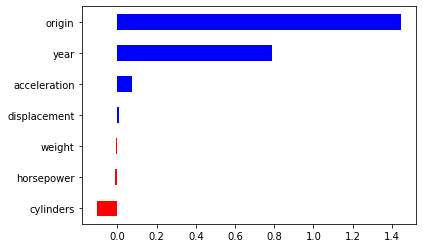

In [ ]:
report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

**L1 (Lasso) Regularization**

L1 Regularization, also called LASSO (Least Absolute Shrinkage and Selection Operator) is should be used to create sparsity in the neural network. In other words, the L1 algorithm will push many weight connections to near 0. When a weight is near 0, the program drops it from the network. Dropping weighted connections will create a sparse neural network.

Feature selection is a useful byproduct of sparse neural networks. Features are the values that the training set provides to the input neurons. Once all the weights of an input neuron reach 0, the neural network training determines that the feature is unnecessary. If your data set has a large number of input features that may not be needed, L1 regularization can help the neural network detect and ignore unnecessary features.

L1 is implemented by adding the following error to the objective to minimize:

$ E_1 = \alpha \sum_w{ |w| } $

You should use L1 regularization to create sparsity in the neural network. In other words, the L1 algorithm will push many weight connections to near 0. When a weight is near 0, the program drops it from the network. Dropping weighted connections will create a sparse neural network. Feature selection is a useful byproduct of sparse neural networks. Features are the values that the training set provides to the input neurons. Once all the weights of an input neuron reach 0, the neural network training determines that the feature is unnecessary. If your data set has a large number of input features that may not be needed, L1 regularization can help the neural network detect and ignore unnecessary features.

The following code demonstrates lasso regression. Notice the effect of the coefficients compared to the previous section that used linear regression.

In [ ]:
import sklearn
from sklearn.linear_model import Lasso

# Create linear regression
regressor = Lasso(random_state=0, alpha=0.1)

# Fit/train Lasso
regressor.fit(x_train,y_train)

# Predict
pred = regressor.predict(x_test)

# Measure RMSE


In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print(f'RMSE: {score}')

RMSE: 3.0083811418983837


,coef,positive
horsepower,-0.008940,False
weight,-0.006497,False
cylinders,-0.000000,True
displacement,0.006466,True
acceleration,0.047556,True
year,0.779997,True
origin,1.158772,True


Intercept: -19.352976558653996


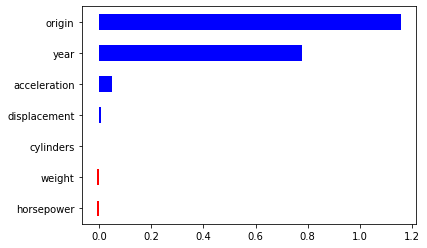

In [ ]:
report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

(1e-08, 100000000.0)

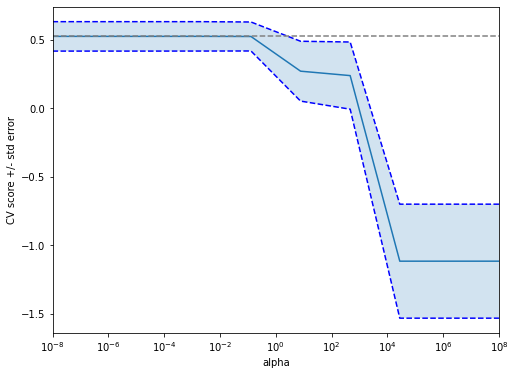

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lasso = Lasso(random_state=42)
alphas = np.logspace(-8, 8, 10)

scores = list()
scores_std = list()

n_folds = 3

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, x, y, cv=n_folds, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

**L2 (Ridge) Regularization**

You should use Tikhonov/Ridge/L2 regularization when you are less concerned about creating a space network and are more concerned about low weight values. The lower weight values will typically lead to less overfitting.

$ E_2 = \alpha \sum_w{ w^2 } $

Like the L1 algorithm, the $\alpha$ value determines how important the L2 objective is compared to the neural network’s error. Typical L2 values are below 0.1 (10%). The main calculation performed by L2 is the summing of the squares of all of the weights. The bias values are not summed.

You should use L2 regularization when you are less concerned about creating a space network and are more concerned about low weight values. The lower weight values will typically lead to less overfitting. Generally L2 regularization will produce better overall performance than L1. However, L1 might be useful in situations where there are a large number of inputs and some of the weaker inputs should be pruned.

The following code uses L2 with linear regression (Ridge regression):

In [ ]:
import sklearn
from sklearn.linear_model import Ridge

# Create linear regression
regressor = Ridge(alpha=1)

# Fit/train Lasso
regressor.fit(x_train,y_train)

# Predict
pred = regressor.predict(x_test)

# Measure RMSE

RMSE: 2.9960075079088893


,coef,positive
cylinders,-0.101129,False
horsepower,-0.009589,False
weight,-0.006549,False
displacement,0.010495,True
acceleration,0.076272,True
year,0.787993,True
origin,1.433607,True


Intercept: -20.84940143867539


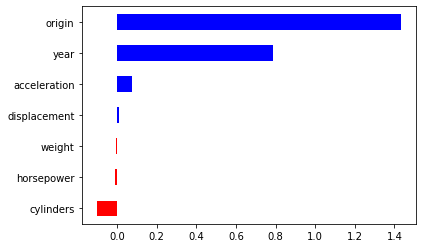

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print(f'RMSE: {score}')

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)


ElasticNet Regularization
The ElasticNet regression combines both L1 and L2. Both penalties are applied. The amount of L1 and L2 are governed by the parameters alpha and beta.

$ a * L1 + b * L2 $

In [ ]:
import sklearn
from sklearn.linear_model import ElasticNet

# Create linear regression
regressor = ElasticNet(alpha=0.1, l1_ratio=0.1)

# Fit/train Lasso
regressor.fit(x_train,y_train)

# Predict
pred = regressor.predict(x_test)

# Measure RMSE

RMSE: 3.0044407553509793


,coef,positive
cylinders,-0.013317,False
horsepower,-0.006836,False
weight,-0.006587,False
displacement,0.006945,True
acceleration,0.072539,True
year,0.783093,True
origin,1.130970,True


Intercept: -19.904990748302193


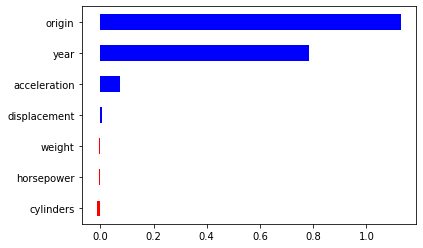

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print(f'RMSE: {score}')

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

 **L1 and L2 Regularization to Decrease Overfitting¶**
 
L1 and L2 regularization are two common regularization techniques that can reduce the effects of overfitting [Cite:ng2004feature]. Both of these algorithms can either work with an objective function or as a part of the backpropagation algorithm. In both cases the regularization algorithm is attached to the training algorithm by adding an additional objective.

Both of these algorithms work by adding a weight penalty to the neural network training. This penalty encourages the neural network to keep the weights to small values. Both L1 and L2 calculate this penalty differently. For gradient-descent-based algorithms, such as backpropagation, you can add this penalty calculation to the calculated gradients. For objective-function-based training, such as simulated annealing, the penalty is negatively combined with the objective score.

Both L1 and L2 work differently in the way that they penalize the size of a weight. L2 will force the weights into a pattern similar to a Gaussian distribution; the L1 will force the weights into a pattern similar to a Laplace distribution, as demonstrated in Figure 5.L1L2.

In [1]:
import pandas as pd
from scipy.stats import zscore

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product']) # Classification
products = dummies.columns
y = dummies.values

In [2]:
########################################
# Keras with L1/L2 for Regression
########################################
# using activity_regularizer instead of kernel_regularizer

import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers

# Cross-validate
kf = KFold(5, shuffle=True, random_state=42)
    
oos_y = []
oos_pred = []
fold = 0

for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    #kernel_regularizer=regularizers.l2(0.01),
    
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], 
            activation='relu',
             activity_regularizer=regularizers.l1(1e-4))) # Hidden 1
    model.add(Dense(25, activation='relu', 
                    activity_regularizer=regularizers.l1(1e-4))) # Hidden 2
    model.add(Dense(y.shape[1],activation='softmax')) # Output
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),
              verbose=0,epochs=500)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    # raw probabilities to chosen class (highest probability)
    pred = np.argmax(pred,axis=1) 
    oos_pred.append(pred)        

    # Measure this fold's accuracy
    y_compare = np.argmax(y_test,axis=1) # For accuracy calculation
    score = metrics.accuracy_score(y_compare, pred)
    print(f"Fold score (accuracy): {score}")


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,axis=1) # For accuracy calculation

score = metrics.accuracy_score(oos_y_compare, oos_pred)
print(f"Final score (accuracy): {score}")    
    
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
#oosDF.to_csv(filename_write,index=False)


Fold #1
Fold score (accuracy): 0.6525
Fold #2
Fold score (accuracy): 0.695
Fold #3
Fold score (accuracy): 0.705
Fold #4
Fold score (accuracy): 0.6275
Fold #5
Fold score (accuracy): 0.6275
Final score (accuracy): 0.6615


**Drop Out for Keras to Decrease Overfitting**

Hinton, Srivastava, Krizhevsky, Sutskever, & Salakhutdinov (2012) introduced the dropout regularization algorithm. [Cite:srivastava2014dropout] Although dropout works in a different way than L1 and L2, it accomplishes the same goal—the prevention of overfitting. However, the algorithm goes about the task by actually removing neurons and connections—at least temporarily. Unlike L1 and L2, no weight penalty is added. Dropout does not directly seek to train small weights. Dropout works by causing hidden neurons of the neural network to be unavailable during part of the training. Dropping part of the neural network causes the remaining portion to be trained to still achieve a good score even without the dropped neurons. This decreases coadaption between neurons, which results in less overfitting.

Most neural network frameworks implement dropout as a separate layer. Dropout layers function as a regular, densely connected neural network layer. The only difference is that the dropout layers will periodically drop some of their neurons during training. You can use dropout layers on regular feedforward neural networks.

The program implements a dropout layer as a dense layer that can eliminate some of its neurons. Contrary to popular belief about the dropout layer, the program does not permanently remove these discarded neurons. A dropout layer does not lose any of its neurons during the training process, and it will still have exactly the same number of neurons after training. In this way, the program only temporarily masks the neurons rather than dropping them.

In [3]:
import pandas as pd
from scipy.stats import zscore

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product']) # Classification
products = dummies.columns
y = dummies.values

In [4]:
########################################
# Keras with dropout for Classification
########################################

import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import regularizers

# Cross-validate
kf = KFold(5, shuffle=True, random_state=42)
    
oos_y = []
oos_pred = []
fold = 0

for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    #kernel_regularizer=regularizers.l2(0.01),
    
    model = Sequential()
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
    model.add(Dropout(0.5))
    model.add(Dense(25, activation='relu', \
                activity_regularizer=regularizers.l1(1e-4))) # Hidden 2
    # Usually do not add dropout after final hidden layer
    #model.add(Dropout(0.5)) 
    model.add(Dense(y.shape[1],activation='softmax')) # Output
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),\
              verbose=0,epochs=500)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    # raw probabilities to chosen class (highest probability)
    pred = np.argmax(pred,axis=1) 
    oos_pred.append(pred)        

    # Measure this fold's accuracy
    y_compare = np.argmax(y_test,axis=1) # For accuracy calculation
    score = metrics.accuracy_score(y_compare, pred)
    print(f"Fold score (accuracy): {score}")


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,axis=1) # For accuracy calculation

score = metrics.accuracy_score(oos_y_compare, oos_pred)
print(f"Final score (accuracy): {score}")    
    
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
#oosDF.to_csv(filename_write,index=False)


Fold #1
Fold score (accuracy): 0.7
Fold #2
Fold score (accuracy): 0.725
Fold #3
Fold score (accuracy): 0.7125
Fold #4
Fold score (accuracy): 0.69
Fold #5
Fold score (accuracy): 0.715
Final score (accuracy): 0.7085
